In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
precios= pd.read_csv("https://raw.githubusercontent.com/DECJ1811/Proyecto-de-Estadistica/refs/heads/main/day-price.csv")
precios.head(5)

,id,_date,_open,_high,_low,_close,adj_close,volumen
0,1,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,2,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,3,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,4,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,5,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [5]:
precios.set_index("id", inplace=True)

In [6]:
#aqui se  crea una nueva columna en la cual se muestra la diferencia con el valor de la accion el dia anterior en porcentaje
crecimiento=precios["adj_close"].pct_change()*100
crecimiento[1]=0
crecimiento.head(5)

,adj_close
id,
1,0.000000
2,10.475532
3,-7.759492
4,-0.310405
5,-0.313988


In [7]:
#Se le agrega esa columna a la tabla
precios["Crecimiento"]=crecimiento
precios.head(5)


,_date,_open,_high,_low,_close,adj_close,volumen,Crecimiento
id,,,,,,,,
1,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.000000
2,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,10.475532
3,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,-7.759492
4,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,-0.310405
5,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,-0.313988


In [8]:
precios.rename(columns={"_date":"Fecha", "_open":"Apertura", "_high": "Mas Alto", "_low":"Mas Bajo", "_close": "Cierre", "adj_close":"Cierre Ajustado", "volumen":"Volumen"}, inplace=True)

In [9]:

precios["Fecha"]=pd.to_datetime(precios["Fecha"])
precios["Fecha"].dt.year.head(5)

,Fecha
id,
1,1999
2,1999
3,1999
4,1999
5,1999


In [10]:
precios.head(5)

,Fecha,Apertura,Mas Alto,Mas Bajo,Cierre,Cierre Ajustado,Volumen,Crecimiento
id,,,,,,,,
1,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.000000
2,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,10.475532
3,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,-7.759492
4,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,-0.310405
5,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,-0.313988


In [11]:
precios.to_csv("Day-Price-Actualizado.csv")

In [12]:
#aqui se ordenan los valores por cuanto crecimiento tuvieron (para verlo al  revez hay que cambiar el False por un True)
precios.sort_values(by=["Crecimiento"], ascending=False)

,Fecha,Apertura,Mas Alto,Mas Bajo,Cierre,Cierre Ajustado,Volumen,Crecimiento
id,,,,,,,,
284,2000-03-07,0.156250,0.181771,0.149479,0.173568,0.159201,1952208000,42.414592
1080,2003-05-09,0.156917,0.179417,0.152500,0.178083,0.163343,9230856000,33.064234
493,2001-01-03,0.120833,0.164323,0.117708,0.163021,0.149527,910368000,30.688284
4483,2016-11-11,1.987750,2.219250,1.962500,2.199250,2.164130,2175344000,29.807041
288,2000-03-13,0.222917,0.312500,0.220833,0.310938,0.285201,2415168000,26.483358
...,...,...,...,...,...,...,...,...
956,2002-11-08,0.102500,0.108583,0.091750,0.094667,0.086831,3798900000,-21.924398
289,2000-03-14,0.309245,0.309245,0.225000,0.229427,0.210437,1567776000,-26.214494
2377,2008-07-03,0.324500,0.328250,0.310000,0.312250,0.286404,2987520000,-30.726587


In [13]:
precios_por_mes=pd.read_csv("https://raw.githubusercontent.com/DECJ1811/Proyecto-de-Estadistica/refs/heads/main/average_monthly_price.csv")
precios_por_mes.head(5)

,id,_year,month_of_year,average_price
0,1,1999,1,0.038357
1,2,1999,2,0.038670
2,3,1999,3,0.039641
3,4,1999,4,0.036500
4,5,1999,5,0.034124


In [14]:
precios_por_mes.rename(columns={"_year":"Año", "month_of_year":"Mes", "average_price":"Precio Promedio"}, inplace=True)

differencias=precios_por_mes["Precio Promedio"].pct_change()*100

precios_por_mes["Crecimiento"]=differencias
precios_por_mes["Crecimiento"][0]=0.0


precios_por_mes.head(5)

<ipython-input-14-79799d80d962>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  precios_por_mes["Crecimiento"][0]=0.0
<ipython-input-14-79799d80d962>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,id,Año,Mes,Precio Promedio,Crecimiento
0,1,1999,1,0.038357,0.000000
1,2,1999,2,0.038670,0.816535
2,3,1999,3,0.039641,2.508637
3,4,1999,4,0.036500,-7.921949
4,5,1999,5,0.034124,-6.509553


In [15]:
#aqui se saca el promedio anual
Promedio_Por_Año=precios_por_mes.groupby("Año")["Precio Promedio"].mean()
Promedio_Por_Año
differencias=Promedio_Por_Año.pct_change()*100



Promedio_Por_Año.head(5)


,Precio Promedio
Año,
1999,0.044145
2000,0.199711
2001,0.300769
2002,0.223432
2003,0.134857


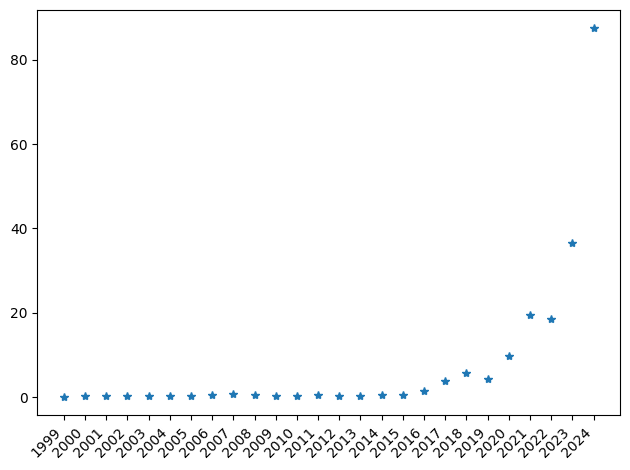

In [16]:
plt.plot(Promedio_Por_Año.index, Promedio_Por_Año.values, "*")
plt.xticks(Promedio_Por_Año.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

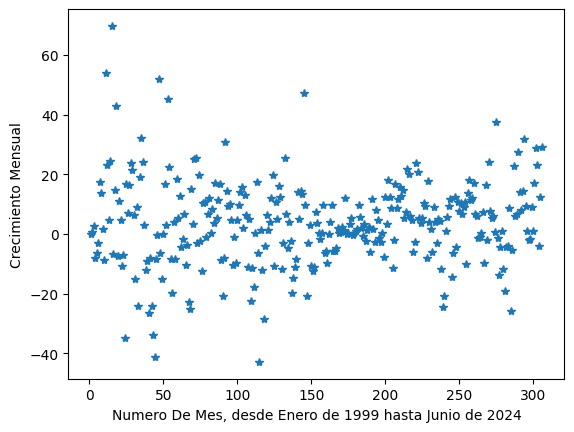

In [17]:

plt.plot(precios_por_mes['id'], precios_por_mes["Crecimiento"], "*")
plt.xlabel("Numero De Mes, desde Enero de 1999 hasta Junio de 2024")
plt.ylabel("Crecimiento Mensual")
plt.show()

Text(0, 0.5, 'Crecimiento Mensual')

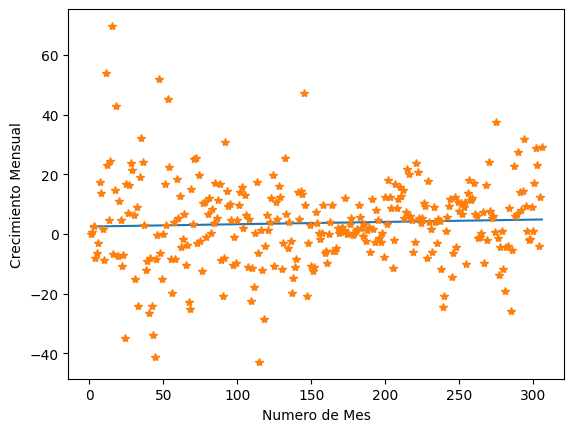

In [36]:
model=LinearRegression()
model.fit(precios_por_mes[['id']].values, precios_por_mes["Crecimiento"])

plt.plot(precios_por_mes['id'], [i*model.coef_ + model.intercept_ for i in precios_por_mes['id']])
plt.plot(precios_por_mes['id'], precios_por_mes["Crecimiento"], "*")
plt.xlabel("Numero de Mes")
plt.ylabel("Crecimiento Mensual")


In [19]:
precios.sort_values(by=["Mas Alto"], ascending=False)

,Fecha,Apertura,Mas Alto,Mas Bajo,Cierre,Cierre Ajustado,Volumen,Crecimiento
id,,,,,,,,
6393,2024-06-18,131.140000,136.330000,130.690000,135.580000,135.580000,292395300,3.511987
6392,2024-06-17,132.990000,133.730000,129.580000,130.980000,130.980000,288504400,-0.682439
6391,2024-06-14,129.960000,132.840000,128.320000,131.880000,131.880000,309320400,1.751408
6390,2024-06-13,129.390000,129.800000,127.160000,129.610000,129.610000,260704500,3.522364
6389,2024-06-12,123.060000,126.880000,122.570000,125.200000,125.200000,299595000,3.548094
...,...,...,...,...,...,...,...,...
89,1999-05-28,0.035677,0.035677,0.035156,0.035547,0.032605,88656000,1.113316
90,1999-06-01,0.035417,0.035677,0.034896,0.035677,0.032724,98544000,0.364975
91,1999-06-02,0.035677,0.035677,0.034375,0.034375,0.031530,130128000,-3.648698


In [ ]:
#Aqui Se Saca la deviacion
precios["Cierre Ajustado"].std()

14.174381013923963

# Aqui se va a sacar el Beta de las acciones de las acciones de nvidia

In [20]:
SP500= pd.read_csv("https://raw.githubusercontent.com/DECJ1811/Proyecto-de-Estadistica/refs/heads/main/SnP500.csv")
SP500.rename(columns={"Date":"Fecha", "Open":"Apertura", "High": "Mas Alto", "Low":"Mas Bajo", "Close": "Cierre",  "Volumen":"Volumen"}, inplace=True)

SP500['Fecha'] = pd.to_datetime(SP500['Fecha'], errors='coerce', utc=True)
SP500["year"] = SP500["Fecha"].dt.year
SP500["month"] = SP500["Fecha"].dt.month


In [21]:
SP500["crecimiento"]=SP500["Cierre"].pct_change()*100

In [22]:
SP500_Por_Mes= SP500.groupby(["year", "month"])["Cierre"].mean().reset_index()
SP500_Por_Mes["Crecimiento"]=SP500_Por_Mes["Cierre"].pct_change()*100
SP500_Por_Mes["Crecimiento"][0]=0


<ipython-input-22-651027c27830>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  SP500_Por_Mes["Crecimiento"][0]=0
<ipython-input-22-651027c27830>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [ ]:
plt.plot(precios_por_mes['id'], precios_por_mes["crecimiento"])
plt.plot(SP500_Por_Mes["id"])

,year,month,Cierre,Crecimiento
0,2014,1,1822.356660,0.000000
1,2014,2,1817.034739,-0.292035
2,2014,3,1863.523339,2.558487
3,2014,4,1864.263335,0.039710
4,2014,5,1889.767142,1.368037


In [23]:
Nvidia20152023=precios_por_mes[(precios_por_mes["Año"] >= 2015) & (precios_por_mes["Año"]<=2023)].reset_index()

SP50020152023=SP500_Por_Mes[(SP500_Por_Mes["year"] >=2015) & (SP500_Por_Mes["year"]<=2023)].reset_index()

In [ ]:
SP500

,Fecha,Apertura,Mas Alto,Mas Bajo,Cierre,Volume,Dividends,Stock Splits,year,month,crecimiento
0,2014-01-02 05:00:00+00:00,1845.859985,1845.859985,1827.739990,1831.979980,3080600000,0.0,0.0,2014,1,NaN
1,2014-01-03 05:00:00+00:00,1833.209961,1838.239990,1829.130005,1831.369995,2774270000,0.0,0.0,2014,1,-0.033297
2,2014-01-06 05:00:00+00:00,1832.310059,1837.160034,1823.729980,1826.770020,3294850000,0.0,0.0,2014,1,-0.251177
3,2014-01-07 05:00:00+00:00,1828.709961,1840.099976,1828.709961,1837.880005,3511750000,0.0,0.0,2014,1,0.608176
4,2014-01-08 05:00:00+00:00,1837.900024,1840.020020,1831.400024,1837.489990,3652140000,0.0,0.0,2014,1,-0.021221
...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22 05:00:00+00:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0,2023,12,0.166006
2512,2023-12-26 05:00:00+00:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0,2023,12,0.423169
2513,2023-12-27 05:00:00+00:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0,2023,12,0.143046
2514,2023-12-28 05:00:00+00:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0,2023,12,0.037017


<function matplotlib.pyplot.show(close=None, block=None)>

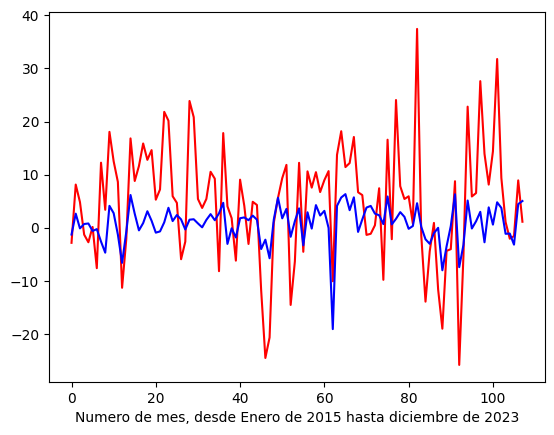

In [ ]:
plt.plot(Nvidia20152023.index, Nvidia20152023["Crecimiento"], "r")
plt.plot(SP50020152023.index, SP50020152023["Crecimiento"], "b")
plt.xlabel("Numero de mes, desde Enero de 2015 hasta diciembre de 2023")
plt.show

In [ ]:
Nvidia20152023.loc[80:100]

,index,id,Año,Mes,Precio Promedio,Crecimiento
80,272,273,2021,9,21.9009,5.929383
81,273,274,2021,10,22.0744,0.792205
82,274,275,2021,11,30.3390,37.439749
83,275,276,2021,12,29.8856,-1.494446
84,276,277,2022,1,25.7314,-13.900340
85,277,278,2022,2,24.5919,-4.428442
86,278,279,2022,3,24.8183,0.920628
87,279,280,2022,4,21.9314,-11.632142
88,280,281,2022,5,17.7668,-18.989212
89,281,282,2022,6,16.9958,-4.339555


In [ ]:
precios[(precios['Fecha'].dt.year==2021) & (precios['Fecha'].dt.month==11)]

,Fecha,Apertura,Mas Alto,Mas Bajo,Cierre,Cierre Ajustado,Volumen,Crecimiento
id,,,,,,,,
5733,2021-11-01,25.649,25.894,25.227,25.827,25.7849,265740000,1.016634
5734,2021-11-02,25.822,26.678,25.800,26.401,26.3580,294112000,2.222619
5735,2021-11-03,26.670,26.784,26.235,26.598,26.5547,239910000,0.746263
5736,2021-11-04,27.229,31.365,27.118,29.801,29.7525,1153631000,12.042313
5737,2021-11-05,30.187,31.400,29.410,29.752,29.7036,851260000,-0.164356
5738,2021-11-08,30.149,31.100,29.907,30.804,30.7538,503101000,3.535598
5739,2021-11-09,32.282,32.310,29.964,30.657,30.6071,646746000,-0.477014
5740,2021-11-10,29.356,30.850,28.778,29.459,29.4110,636206000,-3.907917
5741,2021-11-11,30.468,30.590,29.777,30.390,30.3405,332172000,3.160382


In [25]:
precios["Año"]=precios["Fecha"].dt.year
precios

,Fecha,Apertura,Mas Alto,Mas Bajo,Cierre,Cierre Ajustado,Volumen,Crecimiento,Año
id,,,,,,,,,
1,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.000000,1999
2,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,10.475532,1999
3,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,-7.759492,1999
4,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,-0.310405,1999
5,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,-0.313988,1999
...,...,...,...,...,...,...,...,...,...
6389,2024-06-12,123.060000,126.880000,122.570000,125.200000,125.200000,299595000,3.548094,2024
6390,2024-06-13,129.390000,129.800000,127.160000,129.610000,129.610000,260704500,3.522364,2024
6391,2024-06-14,129.960000,132.840000,128.320000,131.880000,131.880000,309320400,1.751408,2024


In [26]:
nvidiaday20152023=precios[(precios["Año"]>= 2015) & (precios["Año"]<=2023)].reset_index()
nvidiaday20152023.dropna()

,id,Fecha,Apertura,Mas Alto,Mas Bajo,Cierre,Cierre Ajustado,Volumen,Crecimiento,Año
0,4013,2015-01-02,0.50325,0.50700,0.49525,0.50325,0.483218,113680000,0.398921,2015
1,4014,2015-01-05,0.50325,0.50475,0.49250,0.49475,0.475057,197952000,-1.688886,2015
2,4015,2015-01-06,0.49550,0.49600,0.47925,0.47975,0.460654,197764000,-3.031847,2015
3,4016,2015-01-07,0.48325,0.48750,0.47700,0.47850,0.459453,321808000,-0.260716,2015
4,4017,2015-01-08,0.48400,0.49950,0.48375,0.49650,0.476737,283780000,3.761865,2015
...,...,...,...,...,...,...,...,...,...,...
2259,6272,2023-12-22,49.19500,49.38300,48.46700,48.83000,48.823700,252507000,-0.326639,2023
2260,6273,2023-12-26,48.96800,49.60000,48.96000,49.27900,49.272600,244200000,0.919431,2023
2261,6274,2023-12-27,49.51100,49.68000,49.08500,49.41700,49.410600,233648000,0.280075,2023
2262,6275,2023-12-28,49.64300,49.88400,49.41200,49.52200,49.515600,246587000,0.212505,2023


In [27]:
SP500day20152023= SP500[(SP500["year"]>= 2015) & (SP500["year"]<=2023)].reset_index()
SP500day20152023.dropna()

,index,Fecha,Apertura,Mas Alto,Mas Bajo,Cierre,Volume,Dividends,Stock Splits,year,month,crecimiento
0,252,2015-01-02 05:00:00+00:00,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,0.0,0.0,2015,1,-0.033996
1,253,2015-01-05 05:00:00+00:00,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,0.0,0.0,2015,1,-1.827811
2,254,2015-01-06 05:00:00+00:00,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,0.0,0.0,2015,1,-0.889347
3,255,2015-01-07 05:00:00+00:00,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,0.0,0.0,2015,1,1.162984
4,256,2015-01-08 05:00:00+00:00,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,0.0,0.0,2015,1,1.788828
...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2511,2023-12-22 05:00:00+00:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0,2023,12,0.166006
2260,2512,2023-12-26 05:00:00+00:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0,2023,12,0.423169
2261,2513,2023-12-27 05:00:00+00:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0,2023,12,0.143046
2262,2514,2023-12-28 05:00:00+00:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0,2023,12,0.037017


In [33]:
#Se saca la covariancia entre el crecimiento del SP500 con el crecimiento de Nvidia
cov=(SP500day20152023["crecimiento"]).cov((nvidiaday20152023["Crecimiento"]))
#Se saca el Beta dividiendo la covarianza con la varianza del crecimiento del SP500
beta=cov/((SP500day20152023["crecimiento"]).var())
beta

1.6856340324455084

In [29]:
#Se saca la correlacion entre el crecimiento del SP500 con el crecimiento de Nvidia
correlacion= SP500day20152023["crecimiento"].corr(nvidiaday20152023["Crecimiento"])
correlacion

0.6410884033830676

In [35]:
#Se saca la correlacion entre el cierre ajustado con el volumen
correlacionVolumenPrecio= precios["Cierre Ajustado"].corr(precios["Volumen"])
correlacionVolumenPrecio

-0.11493189336715419